In [34]:
import numpy as np
import pandas as pd
from scipy.interpolate import *
pd.set_option("display.max_columns",100)
pd.set_option("display.max_rows",120)
import scipy.stats as sp
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
params={"figure.facecolor":(0.0,0.0,0.0,0),
        "axes.facecolor":(1.0,1.0,1.0,1),
        "savefig.facecolor":(0.0,0.0,0.0,0)}
plt.rcParams.update(params)

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFECV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report,roc_auc_score,roc_curve,confusion_matrix
import warnings
warnings.filterwarnings("ignore")
#Nicholas helped me obtain the OLS regression functions

In [35]:
df=pd.read_csv('weatherAUS.csv')
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,N,13.0,7.0,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [36]:
syd_humid = df.loc[df['Location'] == 'Sydney']
syd_humid.dropna(inplace=True)
maxtempSyd = syd_humid["MaxTemp"]
gustspeedSyd = syd_humid["WindGustSpeed"]

In [37]:
maxtempSyd = maxtempSyd[0:100]
maxtempSyd = np.array(maxtempSyd)
gustspeedSyd = gustspeedSyd[0:100]
gustspeedSyd  = np.array(gustspeedSyd)

Text(0.5, 0.98, 'Sydney Max Temperature vs Wind Gust Speed')

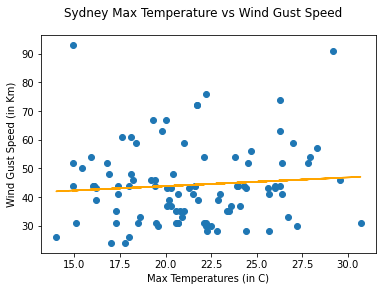

In [40]:
plt.xlabel('Max Temperatures (in C)')
plt.ylabel('Wind Gust Speed (in Km)')
x = maxtempSyd
y = gustspeedSyd
plt.scatter(x, y)
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x+b, color = "orange")
plt.suptitle('Sydney Max Temperature vs Wind Gust Speed')

In [41]:
x = sm.add_constant(x)
model = sm.OLS(y, x)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                 -0.003
Method:                 Least Squares   F-statistic:                    0.7194
Date:                Mon, 26 Apr 2021   Prob (F-statistic):              0.398
Time:                        17:21:32   Log-Likelihood:                -402.32
No. Observations:                 100   AIC:                             808.6
Df Residuals:                      98   BIC:                             813.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         37.7522      7.747      4.873      0.000      22.378      53.126
x1             0.3035      0.358      0.848      0.398      -0.407       1.014
==============================================================================
Omnibus:                       25.092   Durbin-Watson:                   1.702
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               36.053
Skew:                           1.180   Prob(JB):                     1.48e-08
Kurtosis:                       4.757   Cond. No.                         123.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [42]:
mel_humid = df.loc[df['Location'] == 'Melbourne']
mel_humid.dropna(inplace=True)
maxtempMel = mel_humid["MaxTemp"]
gustspeedMel = mel_humid["WindGustSpeed"]

In [43]:
maxtempMel = maxtempMel[0:100]
maxtempMel = np.array(maxtempMel)
gustspeedMel = gustspeedMel[0:100]
gustspeedMel  = np.array(gustspeedMel)

Text(0.5, 0.98, 'Melbourne Max Temperature vs Wind Gust Speed')

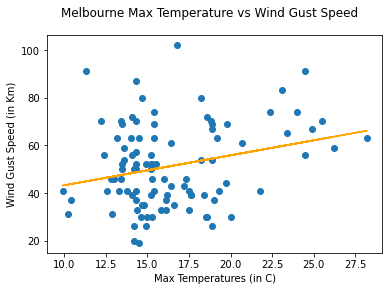

In [46]:
plt.xlabel('Max Temperatures (in C)')
plt.ylabel('Wind Gust Speed (in Km)')
x = maxtempMel
y = gustspeedMel
plt.scatter(x, y)
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x+b, color = "orange")
plt.suptitle('Melbourne Max Temperature vs Wind Gust Speed')

In [45]:
x = sm.add_constant(x)
model = sm.OLS(y, x)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.070
Model:                            OLS   Adj. R-squared:                  0.060
Method:                 Least Squares   F-statistic:                     7.320
Date:                Mon, 26 Apr 2021   Prob (F-statistic):            0.00804
Time:                        17:23:29   Log-Likelihood:                -422.95
No. Observations:                 100   AIC:                             849.9
Df Residuals:                      98   BIC:                             855.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         30.6066      7.834      3.907      0.000      15.060      46.153
x1             1.2589      0.465      2.706      0.008       0.336       2.182
==============================================================================
Omnibus:                        5.202   Durbin-Watson:                   1.173
Prob(Omnibus):                  0.074   Jarque-Bera (JB):                4.939
Skew:                           0.544   Prob(JB):                       0.0846
Kurtosis:                       3.049   Cond. No.                         78.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [47]:
bris_humid = df.loc[df['Location'] == 'Brisbane']
bris_humid.dropna(inplace=True)
maxtempBris = bris_humid["MaxTemp"]
gustspeedBris = bris_humid["WindGustSpeed"]

In [48]:
maxtempBris = maxtempBris[0:100]
maxtempBris = np.array(maxtempBris)
gustspeedBris = gustspeedBris[0:100]
gustspeedBris  = np.array(gustspeedBris)

Text(0.5, 0.98, 'Brisbane Max Temperature vs Wind Gust Speed')

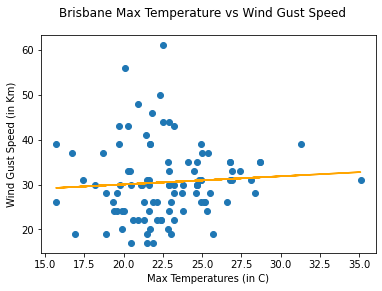

In [49]:
plt.xlabel('Max Temperatures (in C)')
plt.ylabel('Wind Gust Speed (in Km)')
x = maxtempBris
y = gustspeedBris
plt.scatter(x, y)
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x+b, color = "orange")
plt.suptitle('Brisbane Max Temperature vs Wind Gust Speed')

In [50]:
x = sm.add_constant(x)
model = sm.OLS(y, x)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                 -0.005
Method:                 Least Squares   F-statistic:                    0.4731
Date:                Mon, 26 Apr 2021   Prob (F-statistic):              0.493
Time:                        17:25:16   Log-Likelihood:                -353.12
No. Observations:                 100   AIC:                             710.2
Df Residuals:                      98   BIC:                             715.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         26.4039      6.042      4.370      0.000      14.414      38.394
x1             0.1811      0.263      0.688      0.493      -0.341       0.703
==============================================================================
Omnibus:                       19.768   Durbin-Watson:                   1.886
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               25.641
Skew:                           0.996   Prob(JB):                     2.71e-06
Kurtosis:                       4.480   Cond. No.                         166.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""